In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

from pandas import Series, DataFrame
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

In [5]:
price = fetch_california_housing()

In [10]:
X, y = price.data, price.target

In [13]:
X.shape

(20640, 8)

In [14]:
price.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)

In [26]:
gradient_boost = GradientBoostingRegressor(learning_rate=0.01, max_depth=3, random_state=42)

In [27]:
gradient_boost.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, random_state=42)

In [28]:
y_predict = gradient_boost.predict(X_test)

In [29]:
mean_squared_error(y_test, y_predict)

0.663872089183852

In [31]:
mean_absolute_error(y_test, y_predict)

0.6312449363165169

In [33]:
X.shape

(20640, 8)

In [34]:
df = DataFrame(X)

In [36]:
price.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [40]:
df.columns =['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

In [41]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [66]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [71]:
scaler = StandardScaler()

In [72]:
X_scaled = scaler.fit_transform(X)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.75, random_state=42)

In [74]:
gradient = GradientBoostingRegressor()
gradient.fit(X_train, y_train)

GradientBoostingRegressor()

In [76]:
y_predict = gradient_boost.predict(X_test)

In [77]:
mean_squared_error(y_test, y_predict)

1.275238309489038

In [78]:
mean_absolute_error(y_test, y_predict)

0.8892479522881941

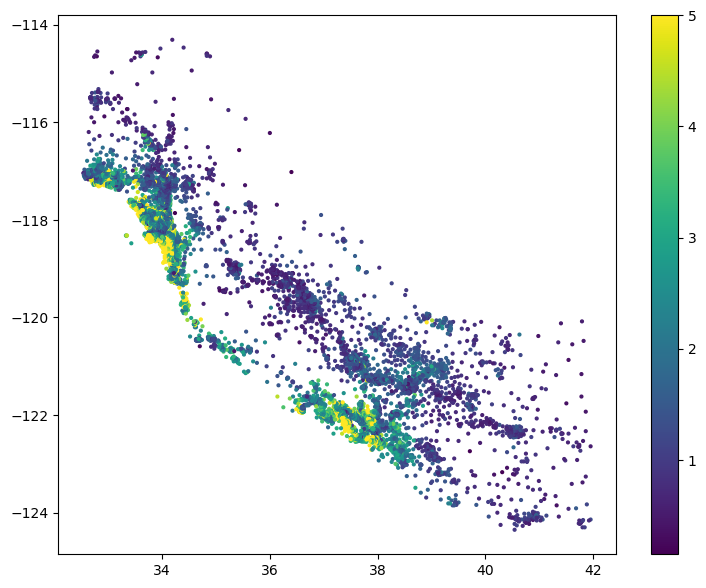

In [58]:
plt.figure(figsize=(9, 7))
ca
plt.scatter(df['Latitude'], df['Longitude'],s = 4, c = y, cmap='viridis')
plt.colorbar()
plt.show()